In [ ]:
"""
Data Description from kaggle:
https://www.kaggle.com/c/titanic/data
2018-09-19

Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage,
the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked 
the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, 
such as women, children, and the upper-class. In this challenge, we ask you to complete the analysis of what sorts of people were
likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. 
Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to 
predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
"""

# Load the dataset - train.csv

In [1]:
# The code was removed by Watson Studio for sharing.

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181219074414-0000
KERNEL_ID = 49675606-f906-4051-a0e4-7d9961472a12


[Row(PassengerId='1', Survived='0', Pclass='3', Name='Braund, Mr. Owen Harris', Sex='male', Age='22', SibSp='1', Parch='0', Ticket='A/5 21171', Fare='7.25', Cabin=None, Embarked='S'),
 Row(PassengerId='2', Survived='1', Pclass='1', Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age='38', SibSp='1', Parch='0', Ticket='PC 17599', Fare='71.2833', Cabin='C85', Embarked='C'),
 Row(PassengerId='3', Survived='1', Pclass='3', Name='Heikkinen, Miss. Laina', Sex='female', Age='26', SibSp='0', Parch='0', Ticket='STON/O2. 3101282', Fare='7.925', Cabin=None, Embarked='S'),
 Row(PassengerId='4', Survived='1', Pclass='1', Name='Futrelle, Mrs. Jacques Heath (Lily May Peel)', Sex='female', Age='35', SibSp='1', Parch='0', Ticket='113803', Fare='53.1', Cabin='C123', Embarked='S'),
 Row(PassengerId='5', Survived='0', Pclass='3', Name='Allen, Mr. William Henry', Sex='male', Age='35', SibSp='0', Parch='0', Ticket='373450', Fare='8.05', Cabin=None, Embarked='S')]

# Initial data exploration

- Identify quality issues (e.g. missing values, wrong measurements, …)

- Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)

- Get an idea on the value distribution of your data using statistical measures and visualizations

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# what columns are in the dataframe
print(df_data_1.columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Passenger classes

<IPython.core.display.Javascript object>


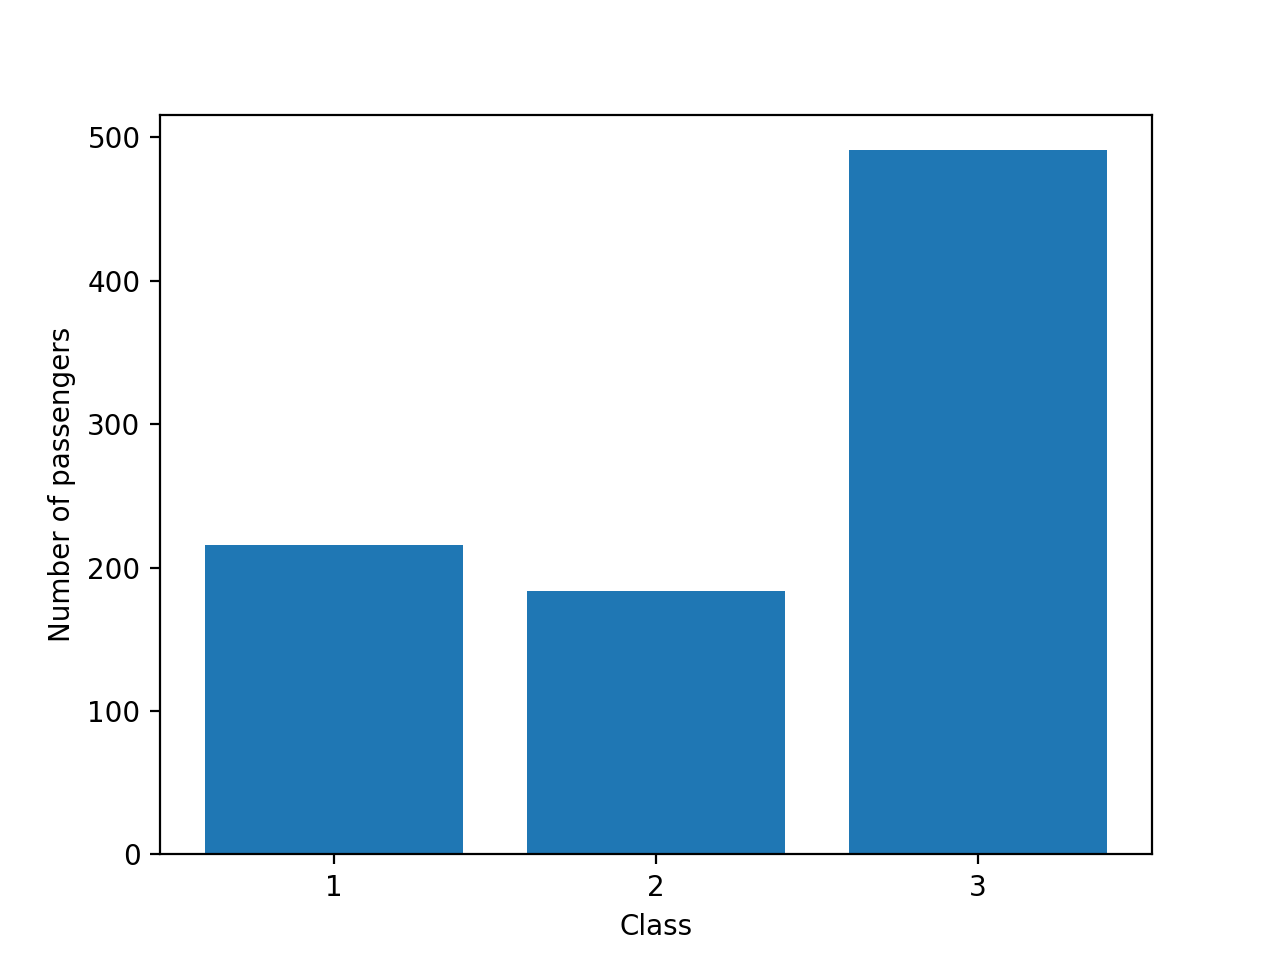

<IPython.core.display.Javascript object>


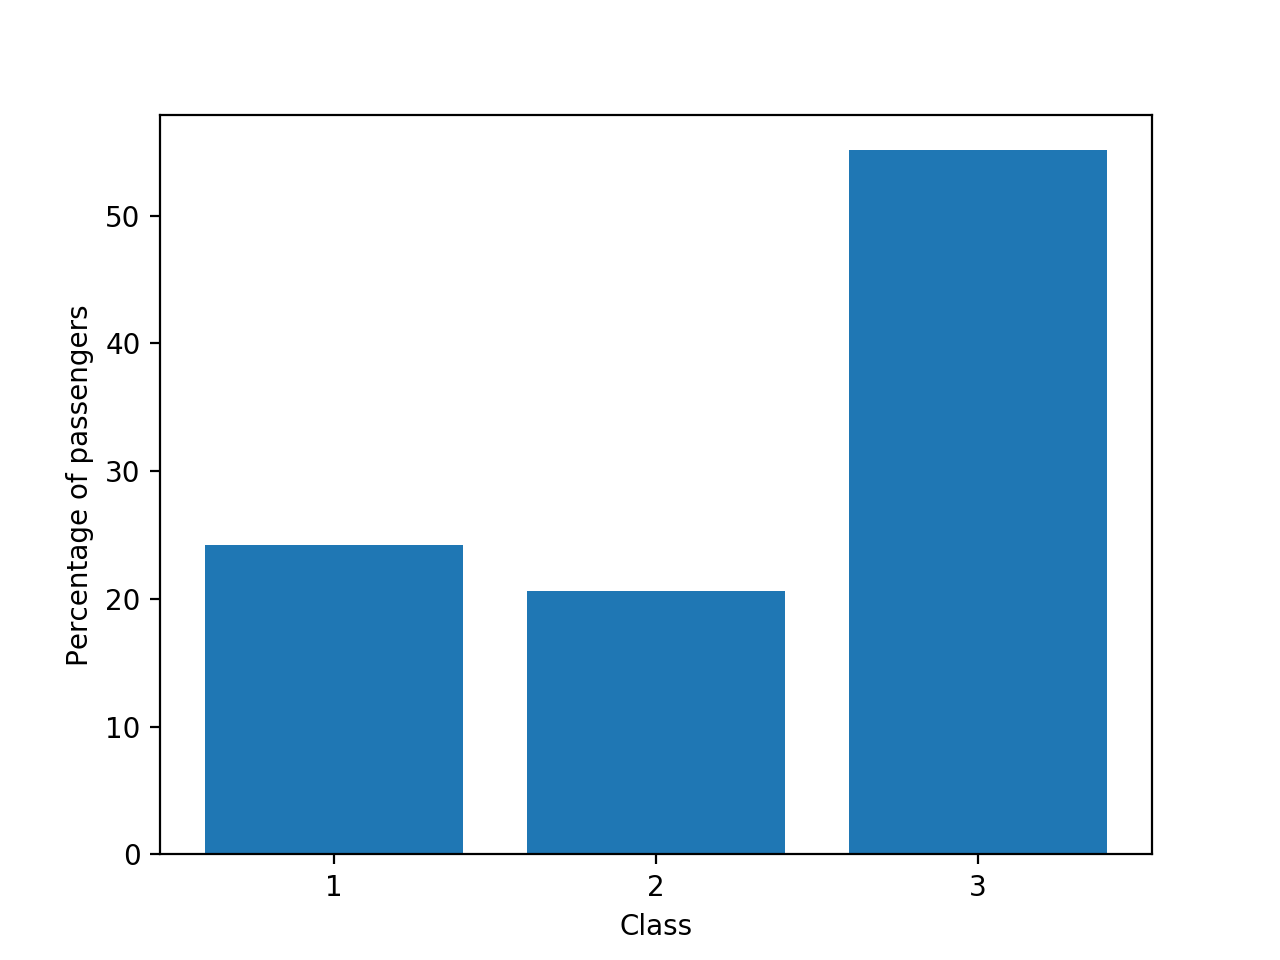

Text(0,0.5,'Percentage of passengers')

In [22]:
# people distribution
# number of people in each class
num_pclass = np.asarray([(df_data_1[( df_data_1['Pclass'] == ii)]).count() for ii in range(1,4)])

plt.figure()
X = [1,2,3]  # classes
Y = num_pclass
plt.bar(X,Y)
plt.xticks(X,X)
plt.xlabel('Class')
plt.ylabel('Number of passengers')

plt.figure()
X = [1,2,3]  # classes
Y = 100*num_pclass/np.sum(num_pclass)
plt.bar(X,Y)
plt.xticks(X,X)
plt.xlabel('Class')
plt.ylabel('Percentage of passengers')

In class 1, 2, 3 percentage amount of people that survived: [ 62.96296296  47.2826087   24.23625255]


<IPython.core.display.Javascript object>


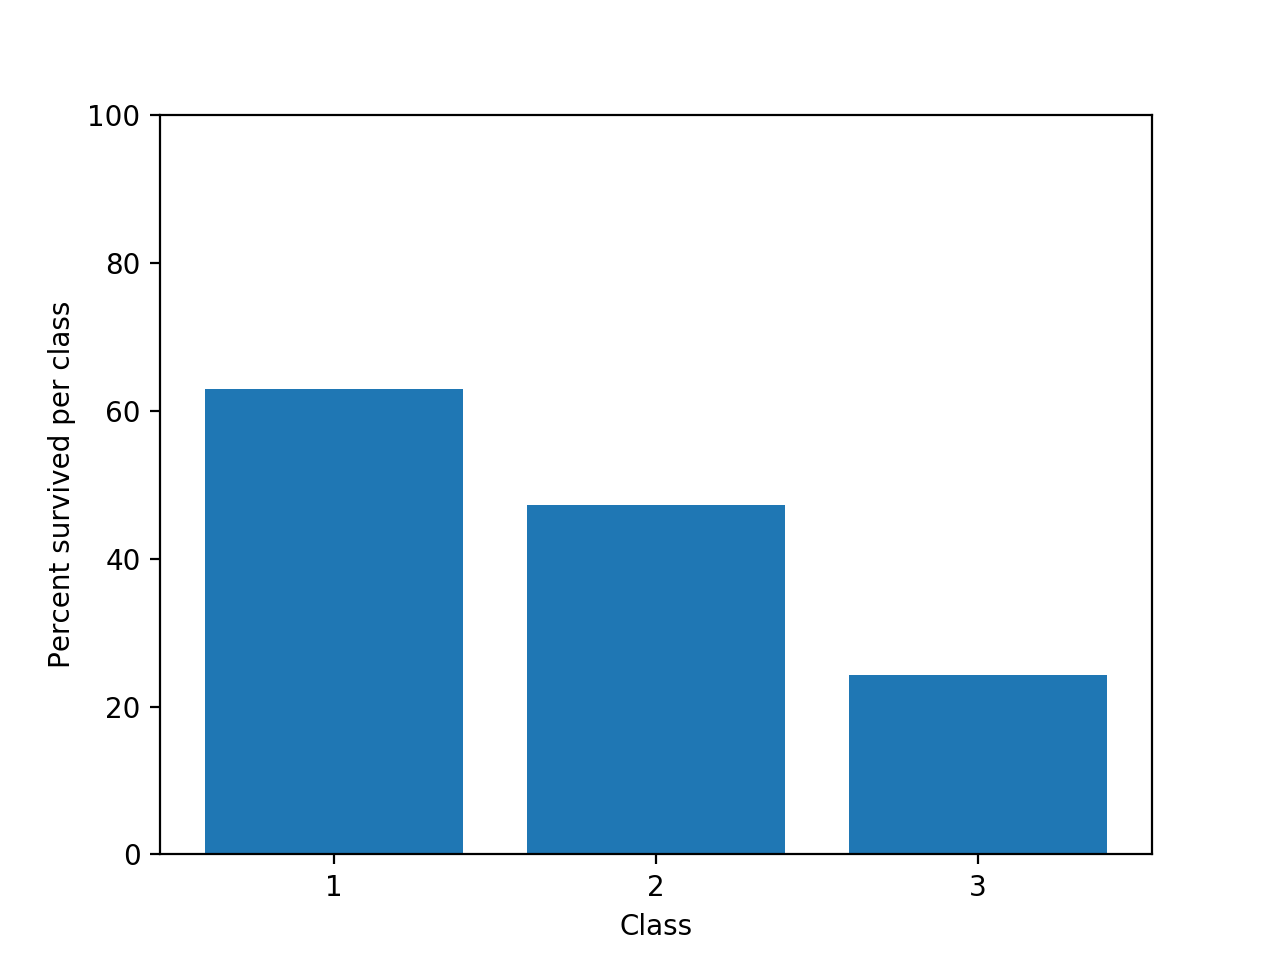

Text(0,0.5,'Percent survived per class')

In [23]:

# number of people survived in each class
num_surv_pclass = np.asarray([(df_data_1[( df_data_1['Pclass'] == ii) & (df_data_1['Survived'] == 1)]).count() for ii in range(1,4)])

print('In class 1, 2, 3 percentage amount of people that survived: {}'.format(100*num_surv_pclass/num_pclass))

X = [1,2,3]
Y = (100*num_surv_pclass/num_pclass)
plt.figure()
plt.ylim(0,100)
plt.bar(X,Y)
plt.xticks(X,X)
plt.xlabel('Class')
plt.ylabel('Percent survived per class')

### Gender

Total number of males, females: [577 314]
Total number of males, females in survivors: [109 233]
Total number of survivors: 342


<IPython.core.display.Javascript object>


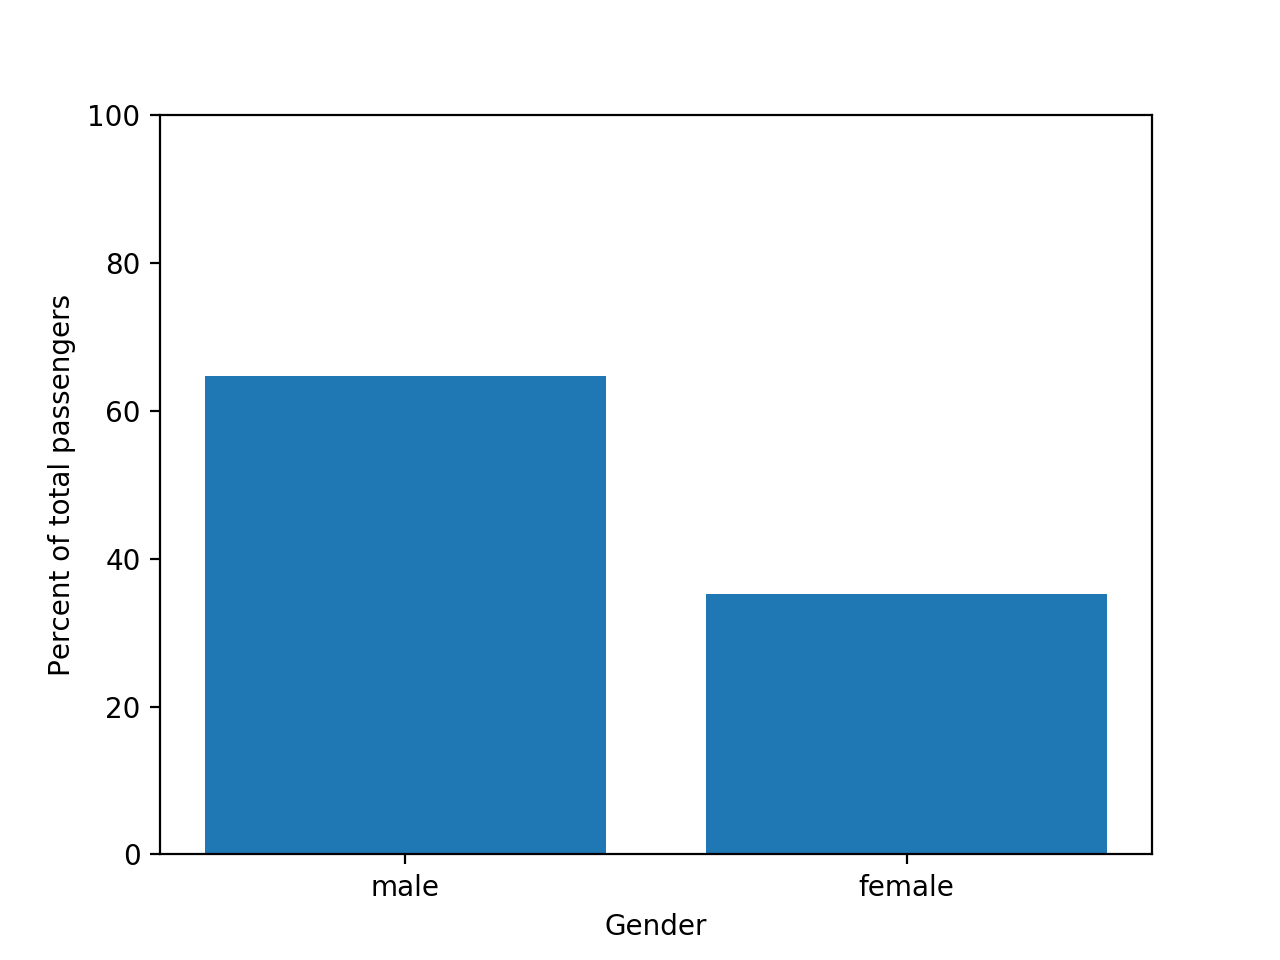

<IPython.core.display.Javascript object>


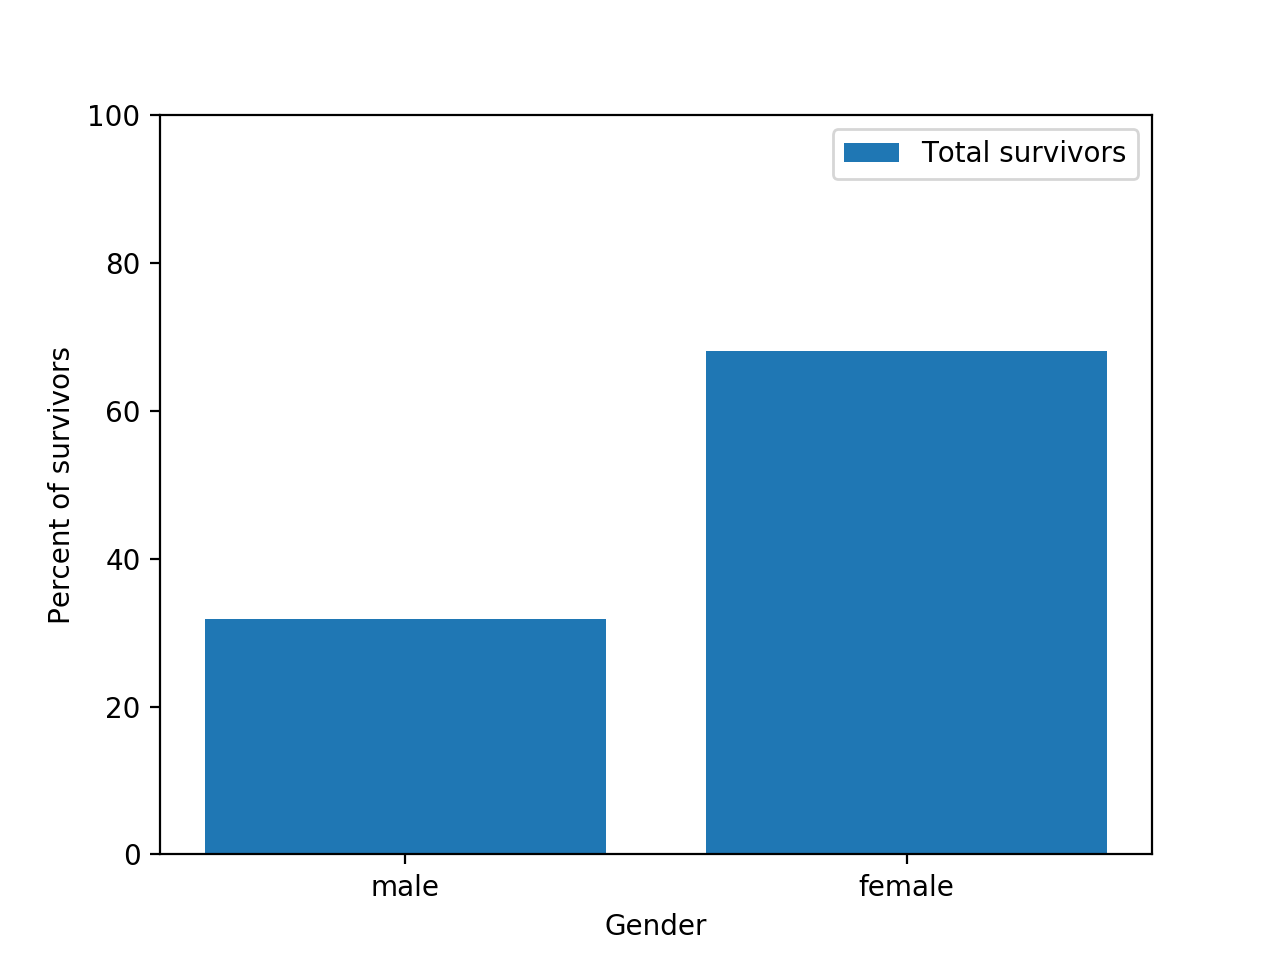

Text(0,0.5,'Percent of survivors')

In [38]:
# Gender
num_sex = np.asarray([(df_data_1[df_data_1.Sex == 'male']).count(), (df_data_1[df_data_1.Sex == 'female']).count()])  # male, female
num_sex_surv = np.asarray([(df_data_1[(df_data_1.Sex == 'male') & (df_data_1.Survived == 1)]).count(), \
                      (df_data_1[(df_data_1.Sex == 'female') & (df_data_1.Survived == 1)]).count()])  # male, female
print('Total number of males, females: {}'.format(num_sex))
print('Total number of males, females in survivors: {}'.format(num_sex_surv))
print('Total number of survivors: {}'.format(df_data_1[ df_data_1.Survived == 1 ].count()))


n = [0,1]
X = ['male', 'female']
Y = (100*num_sex/(df_data_1).count())

Y_surv = (100*num_sex_surv/df_data_1[ df_data_1.Survived == 1 ].count())

# print(num_sex_surv, Y_surv, df_data_1[ df_data_1.Survived == 1 ].count())
plt.figure()
plt.ylim(0,100)
plt.bar(n,Y)
plt.xticks(n,X)
plt.xlabel('Gender')
plt.ylabel('Percent of total passengers')


plt.figure()
plt.ylim(0,100)
plt.bar(n,Y_surv)
plt.legend()
plt.xticks(n,X)
plt.xlabel('Gender')
plt.ylabel('Percent of survivors')


### Age histogram

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+---------------

<IPython.core.display.Javascript object>


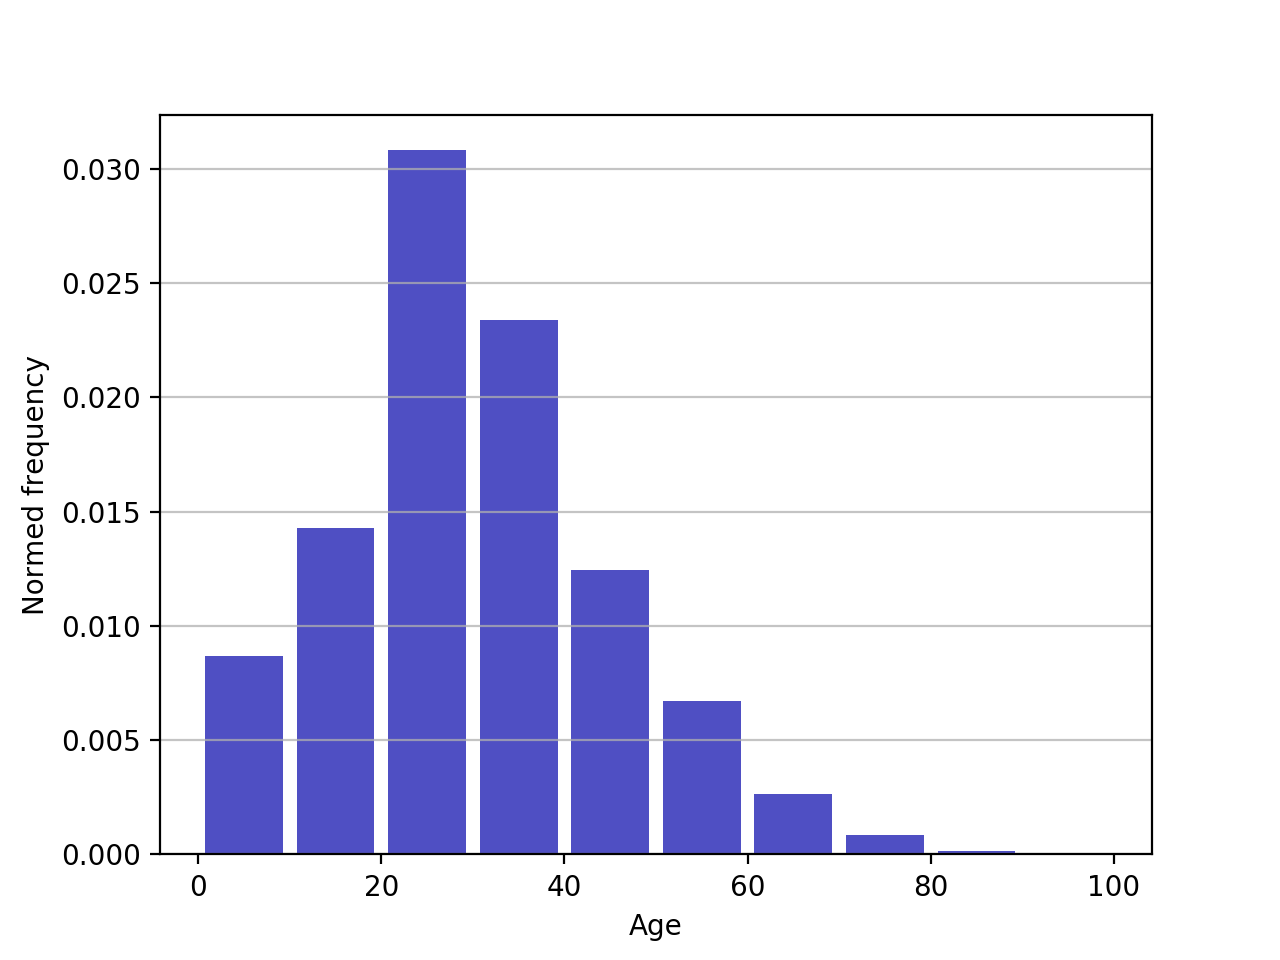

Text(0,0.5,'Normed frequency')

In [88]:
# fill 0 values
df_data_1.fillna('0', subset=['Age']).show(5)

vals = df_data_1.select('Age').collect()
Y = np.array([(v[0]) for v in vals])
Y = Y[Y != np.array(None)].astype(float)

print(Y)
plt.figure()
bins = np.arange(0,100+10,10) 

n, bins, patches = plt.hist(x=Y, bins=bins, color='#0504aa',alpha=0.7, rwidth=0.85, density=True)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Normed frequency')
# plt.title('My Very Own Histogram')

### Age summary statistics

In [122]:
df_data_1.select(df_data_1.Age.cast("float")).registerTempTable("df_age")
spark.sql("""SELECT \
          MAX(Age) AS max,
          MEAN(Age) AS mean, 
          MIN(Age) AS min 
          FROM df_age""").collect()


[Row(max=80.0, mean=29.69911764704046, min=0.41999998688697815)]

In [139]:
print('Null entries in age: {}'.format(spark.sql("""SELECT Age FROM df_age WHERE Age IS NULL""").count()))

Null entries in age: 177


### Fare summary statistics

In [127]:
df_data_1.select(df_data_1.Fare.cast("float")).registerTempTable("df_fare")
spark.sql("""SELECT \
          MAX(Fare) AS max,
          MEAN(Fare) AS mean, 
          MIN(Fare) AS min 
          FROM df_fare""").collect()


[Row(max=512.3292236328125, mean=32.20420804114722, min=0.0)]

In [142]:
print('Null entries in fare: {}'.format(spark.sql("""SELECT Fare FROM df_fare WHERE Fare IS NULL""").collect()))


Null entries in fare: []


+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex|Age|SibSp|Parch|   Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|male| 22|    1|    0|A/5 21171|7.25| null|       S|
+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
only showing top 1 row



<IPython.core.display.Javascript object>


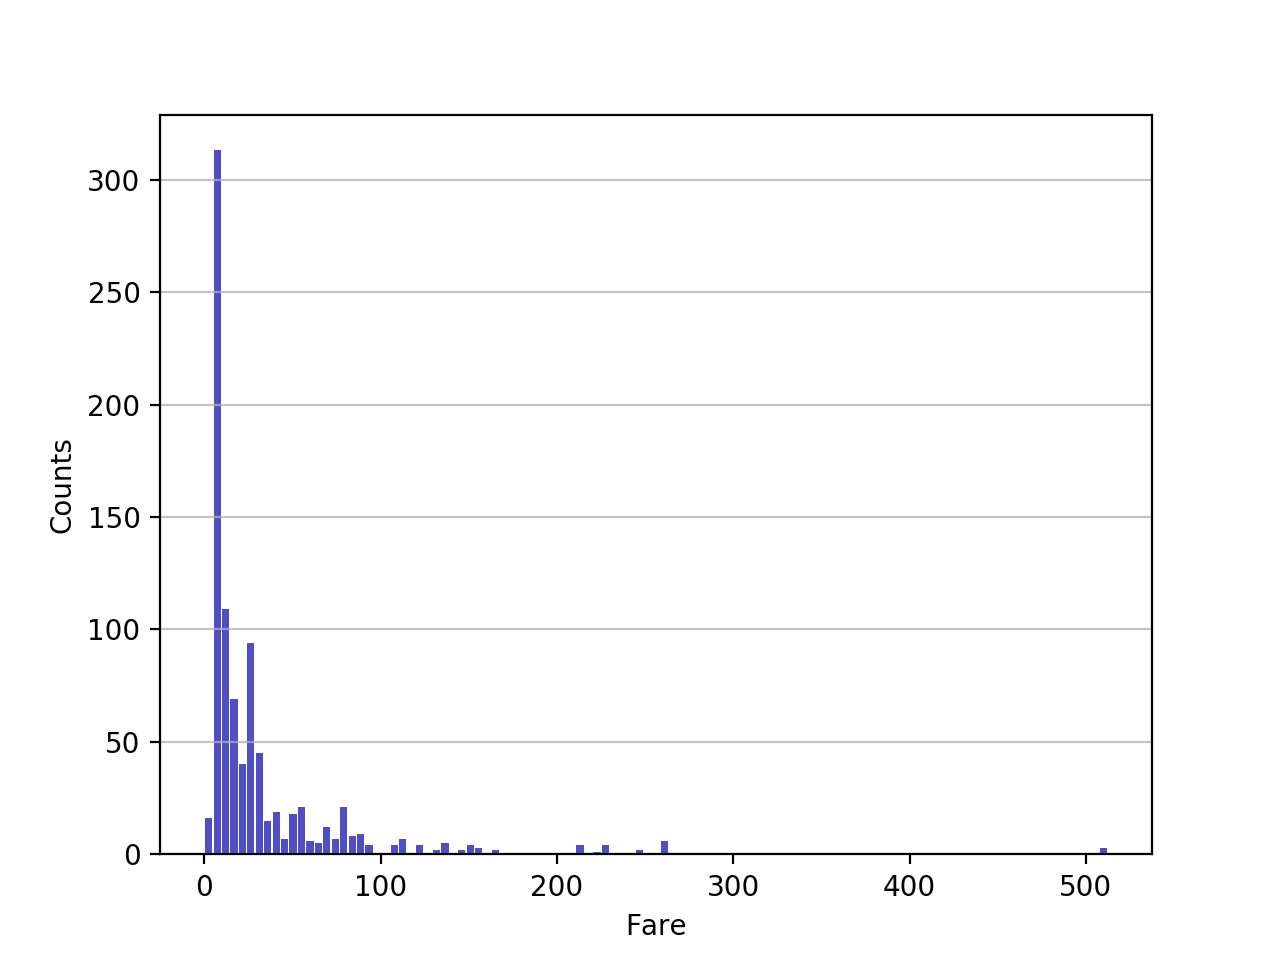

Text(0,0.5,'Counts')

In [169]:
# fare histogram
# fill 0 values
df_data_1.fillna('0', subset=['Fare']).show(1)

vals = df_data_1.select('Fare').collect()
Y = np.array([(v[0]) for v in vals])
Y = Y[Y != np.array(None)].astype(float)


plt.figure()
bins = np.arange(0,6+0.5,0.5) 

n, bins, patches = plt.hist(x=Y, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Fare')
plt.ylabel('Counts')
# plt.title('My Very Own Histogram')

### siblings
- How many passengers do have siblings
- Histogram of sibling distributions

In [153]:
# how many passengers do have a sibling aboard
df_data_1.select(df_data_1.SibSp.cast("float")).registerTempTable("df_sibsp")
num_sib = spark.sql("""SELECT * FROM df_sibsp WHERE SibSp > 0""").count()

print('Number of passengers with a sibling aboard: {}'.format(num_sib))

# summary statistics
spark.sql("""SELECT MAX(SibSp) as max, MEAN(SibSp) as mean, MIN(SibSp) FROM df_sibsp""").collect()


Number of passengers with a sibling aboard: 283


[Row(max=8.0, mean=0.5230078563411896, min(SibSp)=0.0)]

+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex|Age|SibSp|Parch|   Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|male| 22|    1|    0|A/5 21171|7.25| null|       S|
+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
only showing top 1 row



<IPython.core.display.Javascript object>


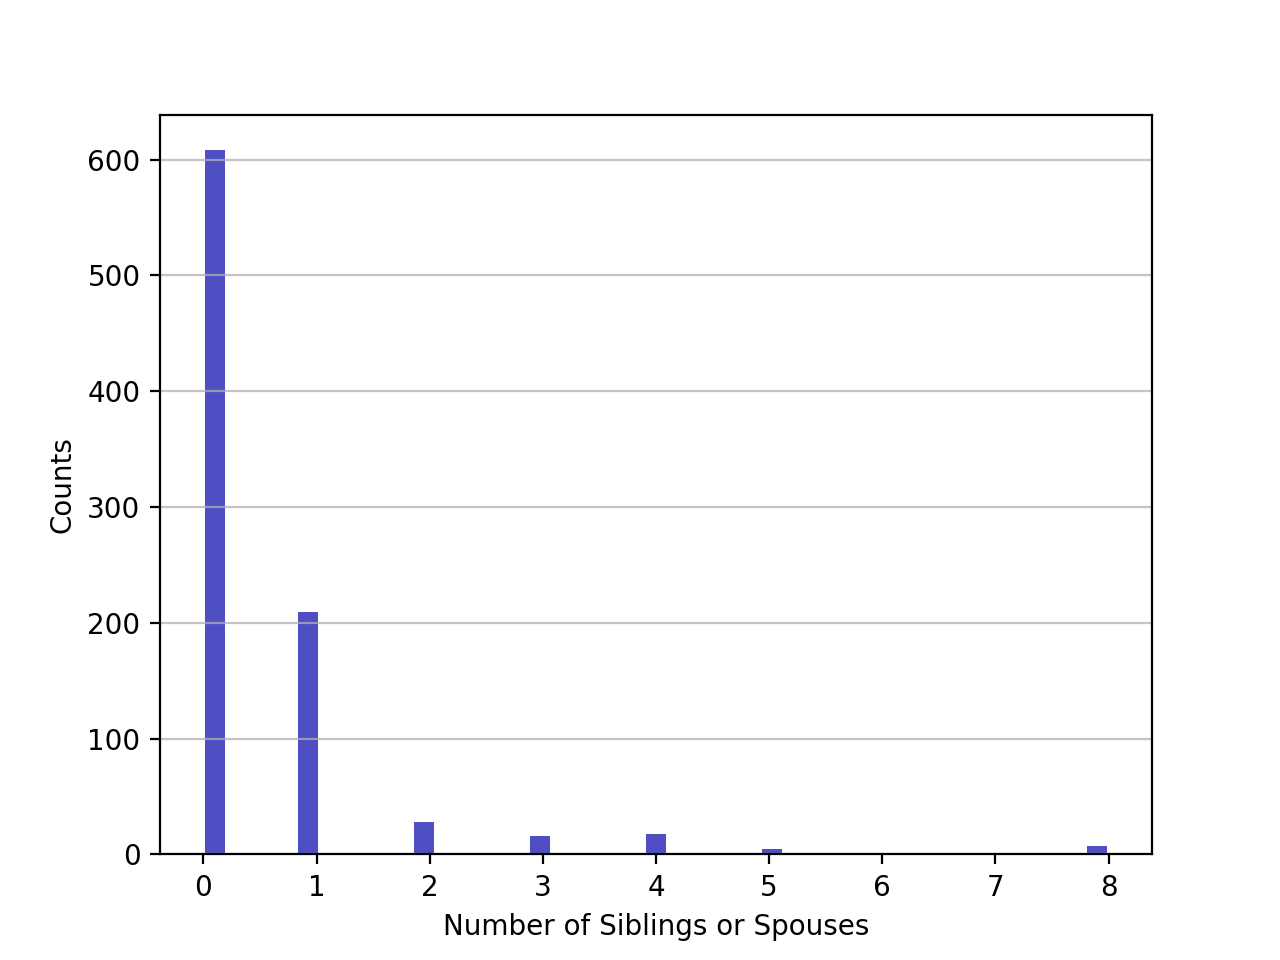

Text(0,0.5,'Counts')

In [167]:
# sibling histogram
# fill 0 values
df_data_1.fillna('0', subset=['SibSp']).show(1)

vals = df_data_1.select('SibSp').collect()
Y = np.array([(v[0]) for v in vals])
Y = Y[Y != np.array(None)].astype(float)


plt.figure()
bins = np.arange(0,9+0.1,0.1) 

n, bins, patches = plt.hist(x=Y, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Counts')
# plt.title('My Very Own Histogram')

### Parents
- Histogram of parents / child distributions

In [162]:
# how many passengers do have a sibling aboard
df_data_1.select(df_data_1.Parch.cast("float")).registerTempTable("df_parch")
num_parch = spark.sql("""SELECT * FROM df_parch WHERE Parch > 0""").count()

print('Number of passengers with a parent or child aboard: {}'.format(num_parch))

# summary statistics
spark.sql("""SELECT MAX(Parch) as max, MEAN(Parch) as mean, MIN(Parch) FROM df_parch""").collect()


Number of passengers with a parent or child aboard: 213


[Row(max=6.0, mean=0.38159371492704824, min(Parch)=0.0)]

+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex|Age|SibSp|Parch|   Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|male| 22|    1|    0|A/5 21171|7.25| null|       S|
+-----------+--------+------+--------------------+----+---+-----+-----+---------+----+-----+--------+
only showing top 1 row



<IPython.core.display.Javascript object>


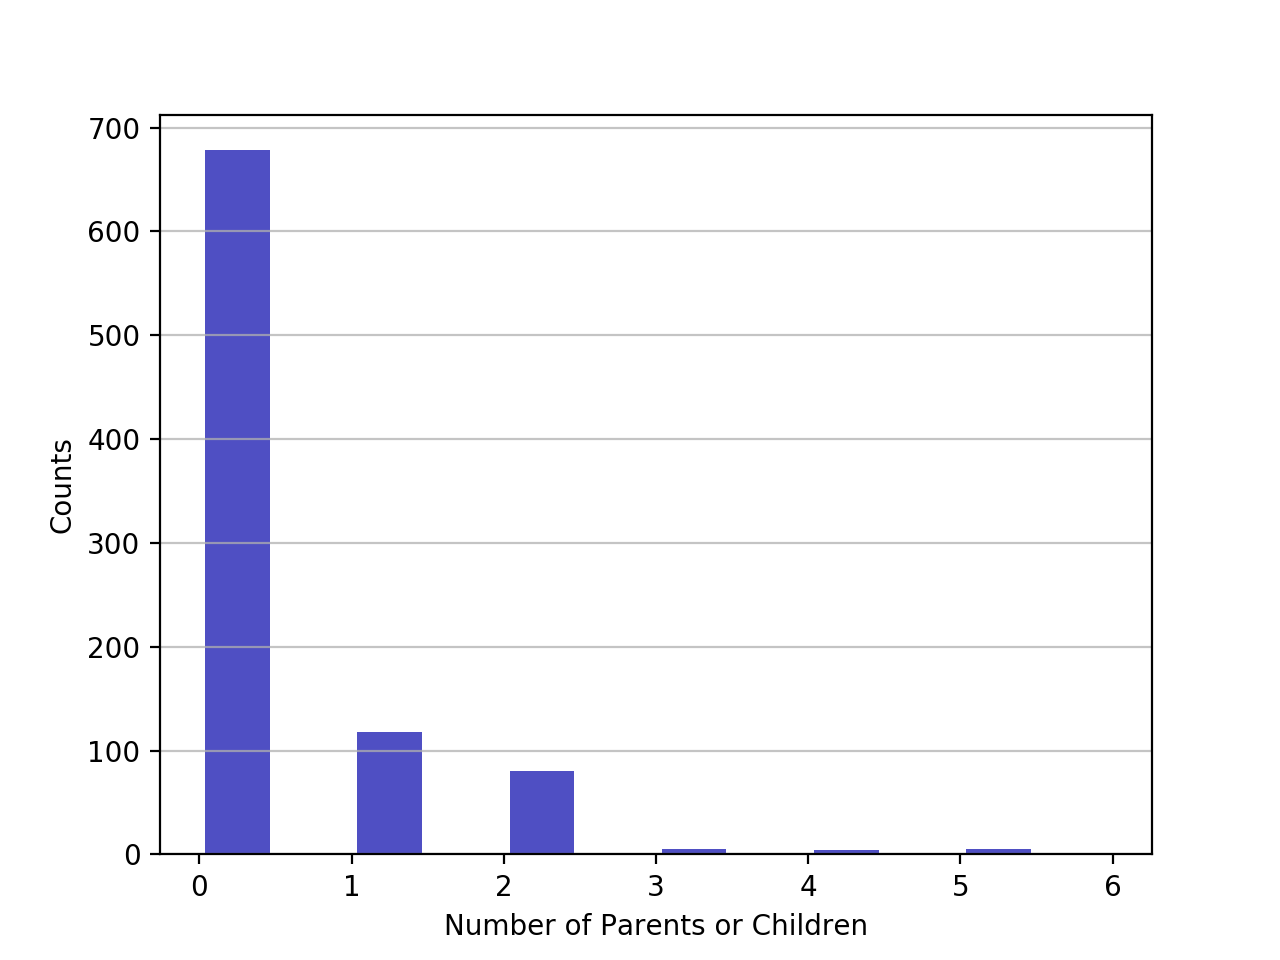

Text(0,0.5,'Counts')

In [168]:
# parents histogram
# fill 0 values
df_data_1.fillna('0', subset=['Parch']).show(1)

vals = df_data_1.select('Parch').collect()
Y = np.array([(v[0]) for v in vals])
Y = Y[Y != np.array(None)].astype(float)


plt.figure()
bins = np.arange(0,6+0.5,0.5) 

n, bins, patches = plt.hist(x=Y, bins=bins, color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Parents or Children')
plt.ylabel('Counts')
# plt.title('My Very Own Histogram')

### Embarked: Port where the passengers entered the ship

In [171]:
df_data_1.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [176]:
df_data_1.registerTempTable("df")
num_no_embarked = spark.sql("""SELECT Embarked FROM df WHERE Embarked IS NULL""").count()
print('{} entries have no embarked data'.format(num_no_embarked))

2 entries have no embarked data


<IPython.core.display.Javascript object>


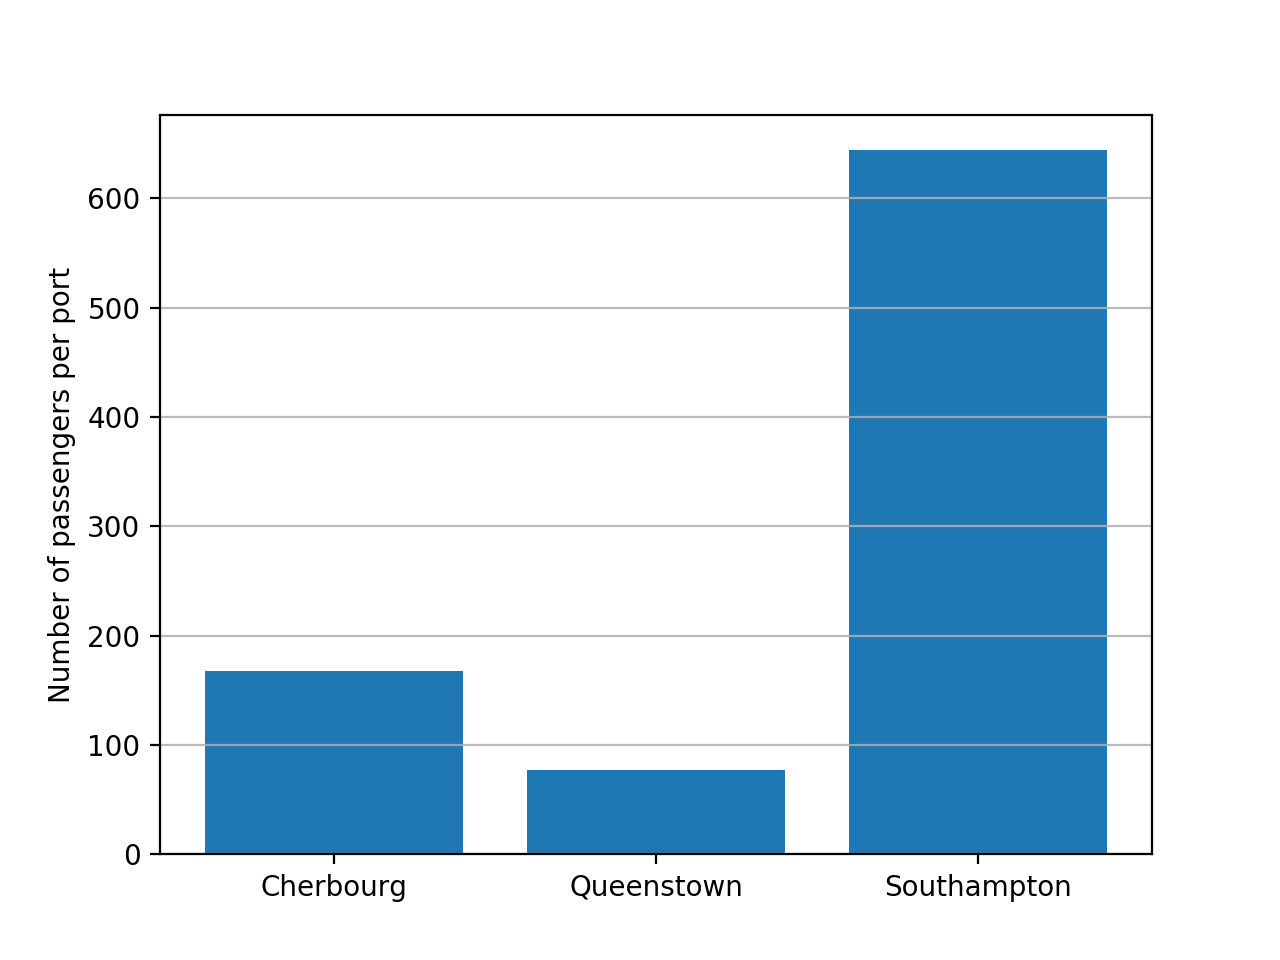

Text(0,0.5,'Number of passengers per port')

In [181]:
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

num_C = spark.sql("""SELECT Embarked FROM df WHERE Embarked == "C" """).count()
num_S = spark.sql("""SELECT Embarked FROM df WHERE Embarked == "S" """ ).count()
num_Q = spark.sql("""SELECT Embarked FROM df WHERE Embarked == "Q" """).count()

X = ['Cherbourg', 'Queenstown', 'Southampton']
n = [1,2,3]
Y = [num_C, num_Q, num_S]
plt.figure()
plt.bar(n,Y)
plt.xticks(n,X)
plt.grid(axis='y', alpha=0.85)
plt.ylabel('Number of passengers per port')